In [17]:
import pandas as pd

# Load your CSV
df = pd.read_csv('/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract.csv')

# Pivot the data
pivoted_df = df.pivot(columns='order', values='paths')

# Rename columns for clarity
pivoted_df.columns = ['Group1Col' if col == 1 else 'Group2Col' for col in pivoted_df.columns]

# Reset index to make it a standard dataframe
pivoted_df.reset_index(drop=True, inplace=True)

# Save to a new CSV (optional)
pivoted_df.to_csv('/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract_p.csv', index=False)

display(pivoted_df)


,Group1Col,Group2Col
0,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...,NaN
1,NaN,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
2,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...,NaN
3,NaN,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
4,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...,NaN
...,...,...
57,NaN,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
58,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...,NaN
59,NaN,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
60,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...,NaN


In [18]:
import pandas as pd

# Load your CSV
df = pd.read_csv('/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract_p.csv')

# Separate groups into lists and drop NaN values
group1 = df['Group1Col'].dropna().reset_index(drop=True)
group2 = df['Group2Col'].dropna().reset_index(drop=True)

# Align the lists into a new DataFrame
aligned_df = pd.DataFrame({'Group1Col': group1, 'Group2Col': group2})

# Save to a new CSV (optional)
aligned_df.to_csv('/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract_p_a.csv', index=False)

print(aligned_df)


                                            Group1Col  \
0   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
1   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
2   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
3   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
4   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
5   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
6   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
7   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
8   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
9   /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
10  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
11  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
12  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
13  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
14  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
15  /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...   
16  /Volumes/AP_ExHD/CalvinsAtr

# Optional - Discover Files

Find Files to Add Together

In [3]:
import glob
import pandas as pd

def find_files(root_dir, target_str):
    """
    Return a list of files globbed using a root directory and a target string.

    Args:
        root_dir (str): The root directory to start the search.
        target_str (str): The target string to match in file names.

    Returns:
        list: A list of file paths matching the target string.
    
    # Example usage:
    root_directory = '/path/to/root/directory'
    target_string = 'example'

    files_matching_target = find_files(root_directory, target_string)
    print(files_matching_target)
    """
    search_pattern = f"{root_dir}/**/*{target_str}*"
    files = glob.glob(search_pattern, recursive=True)
    return files

def create_dataframe_and_save(paths, output_path):
    """
    Creates a pandas DataFrame from a list of file paths with a single column 'paths'.
    The DataFrame is saved to a specified output path without an index.

    Parameters:
    - paths (list): A list of file paths to include in the DataFrame.
    - output_path (str): The file path where the DataFrame should be saved as a CSV.

    Prints messages indicating the progress and completion of the DataFrame creation and saving process.
    Includes error handling for potential issues during the DataFrame creation and saving process.
    """
    try:
        # Creating the DataFrame
        df = pd.DataFrame(paths, columns=['paths'])
        print("DataFrame created successfully.")

        # Saving the DataFrame to the specified output path
        df.to_csv(output_path, index=False)
        print(f"DataFrame saved successfully to {output_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")
    return df

Define the Root Directory and Target String of Files to Add

In [4]:
path = '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT'
target = '*/unthresh*/*csf-plus-gm.nii'

In [6]:
file_list = find_files(path, target)
file_list = list(set(file_list))

In [7]:
file_list

['/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-12580/ses-23192/unthresholded_tissue_segment_z_scores/sub-12580_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-13549/ses-24185/unthresholded_tissue_segment_z_scores/sub-13549_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-7135/ses-23864/unthresholded_tissue_segment_z_scores/sub-7135_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-13207/ses-24321/unthresholded_tissue_segment_z_scores/sub-13207_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-13748/ses-24006/unthresholded_tissue_segment_z_scores/sub-13748_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-13992/ses-24064/unthresholded_tissue_segment_z_scores/sub-13992_csf-plus-gm.nii',
 '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/sub-14504/ses-24315/unthreshold

Edit the Files Above to Select the Specific Files you Want to Combine

In [19]:
file_list = [
 '/Volumes/Expansion/datasets/SANTE_Epilepsy_DBS_ANT/derivatives/conn/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/Queensland_PD_DBS_STN/derivatives/conn/_summary_maps/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/Kahana_Epilepsy_iEEG/derivatives/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/GRAFMAN_TBI_MULTIFOCAL/grafman_fc/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/Episodic_Memory_Lesions/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/CORBETTA_STROKE_MULTIFOCAL/BIDS_Dataset/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/ADVANCE_AD_DBS_FORNIX/connectivity_data/vta_published_t_connectivity/connectivity_summary/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/Manitoba_PET/_averaged_summed_binarized_connectivity.nii',
 '/Volumes/Expansion/datasets/adni/neuroimaging/true_ad_randomized/connectivity/_averaged_summed_binarized_connectivity.nii'
]

Define CSV Output Path

In [8]:
path = '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract.csv'

Run it

In [9]:
df = create_dataframe_and_save(paths=file_list, output_path=path)
df

DataFrame created successfully.
DataFrame saved successfully to /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract.csv.


,paths
0,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
1,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
2,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
3,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
4,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
...,...
57,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
58,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
59,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...
60,/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_S...


# Import Files

To import from CSV:
- import_path = 'files_to_import.csv'
- file_column = None
- file_pattern = None

To import from Folder
- 
- 
-

In [19]:
path = '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/files_to_subtract_p_a.csv'
file_column = 'ses1'
file_pattern = None #'*_T.nii*'

output_directory = '/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/analysis' #'path'

In [20]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
matrix_df1 = GiiNiiFileImport(import_path=path, file_column=file_column, file_pattern=file_pattern).run()
matrix_df1

Attempting to import from: files_to_subtract_p_a.csv


,sub-10161_csf-plus-gm.nii,sub-10851_csf-plus-gm.nii,sub-11947_csf-plus-gm.nii,sub-12290_csf-plus-gm.nii,sub-12378_csf-plus-gm.nii,sub-12462_csf-plus-gm.nii,sub-12497_csf-plus-gm.nii,sub-12499_csf-plus-gm.nii,sub-12580_csf-plus-gm.nii,sub-12742_csf-plus-gm.nii,...,sub-13992_csf-plus-gm.nii,sub-14018_csf-plus-gm.nii,sub-14075_csf-plus-gm.nii,sub-14376_csf-plus-gm.nii,sub-14490_csf-plus-gm.nii,sub-14504_csf-plus-gm.nii,sub-2260_csf-plus-gm.nii,sub-5125_csf-plus-gm.nii,sub-7135_csf-plus-gm.nii,sub-7591_csf-plus-gm.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
file_column = 'ses2'
matrix_df2 = GiiNiiFileImport(import_path=path, file_column=file_column, file_pattern=file_pattern).run()
matrix_df2

Attempting to import from: files_to_subtract_p_a.csv


,sub-10161_csf-plus-gm.nii,sub-10851_csf-plus-gm.nii,sub-11947_csf-plus-gm.nii,sub-12290_csf-plus-gm.nii,sub-12378_csf-plus-gm.nii,sub-12462_csf-plus-gm.nii,sub-12497_csf-plus-gm.nii,sub-12499_csf-plus-gm.nii,sub-12580_csf-plus-gm.nii,sub-12742_csf-plus-gm.nii,...,sub-13992_csf-plus-gm.nii,sub-14018_csf-plus-gm.nii,sub-14075_csf-plus-gm.nii,sub-14376_csf-plus-gm.nii,sub-14490_csf-plus-gm.nii,sub-14504_csf-plus-gm.nii,sub-2260_csf-plus-gm.nii,sub-5125_csf-plus-gm.nii,sub-7135_csf-plus-gm.nii,sub-7591_csf-plus-gm.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3 = matrix_df1 - matrix_df2
from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
df3['sum'] = 
for col in df3:
    view_and_save_nifti(df3[col], out_dir='/Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction', output_name=col)

Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/analyses/subtraction
Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/a

# Add and save nifits

In [53]:
# Replace NaN values with 0
import numpy as np

# matrix_df1.values[:] = np.where((matrix_df1.values > -7) & (matrix_df1.values < 7), 0, matrix_df1.values)
# nifti_name = '_summed_connectivity'

# matrix_df1.values[:] = np.where(matrix_df1.values < -7, 1, np.where(matrix_df1.values > 7, 1, 0))
matrix_df1.values[:] = np.where(matrix_df1.values == 1.0, 1, 0)
nifti_name = '_summed_binarized_connectivity'

matrix_df1.fillna(0, inplace=True)
matrix_df1
# drop some lesions
# Drop every third column (0-indexed, so 2, 5, 8, ...)
# matrix_df1.drop(matrix_df1.columns[1::2], axis=1, inplace=True)


,_averaged_summed_binarized_connectivity.nii,_summary_maps/_averaged_summed_binarized_connectivity.nii,derivatives/_averaged_summed_binarized_connectivity.nii,grafman_fc/_averaged_summed_binarized_connectivity.nii,Episodic_Memory_Lesions/_averaged_summed_binarized_connectivity.nii,BIDS_Dataset/_averaged_summed_binarized_connectivity.nii,connectivity_summary/_averaged_summed_binarized_connectivity.nii,Manitoba_PET/_averaged_summed_binarized_connectivity.nii,connectivity/_averaged_summed_binarized_connectivity.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
df3['avg'] = df3.mean(axis=1)
df3

,sub-10161_csf-plus-gm.nii,sub-10851_csf-plus-gm.nii,sub-11947_csf-plus-gm.nii,sub-12290_csf-plus-gm.nii,sub-12378_csf-plus-gm.nii,sub-12462_csf-plus-gm.nii,sub-12497_csf-plus-gm.nii,sub-12499_csf-plus-gm.nii,sub-12580_csf-plus-gm.nii,sub-12742_csf-plus-gm.nii,...,sub-14075_csf-plus-gm.nii,sub-14376_csf-plus-gm.nii,sub-14490_csf-plus-gm.nii,sub-14504_csf-plus-gm.nii,sub-2260_csf-plus-gm.nii,sub-5125_csf-plus-gm.nii,sub-7135_csf-plus-gm.nii,sub-7591_csf-plus-gm.nii,summed,avg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# nifti_name = 'binary_summed_connectivity'

Image saved to: 
 /Volumes/AP_ExHD/CalvinsAtrophyMapping_PINES_SCHIZOPHRENIA_ECT/metadata/analysis



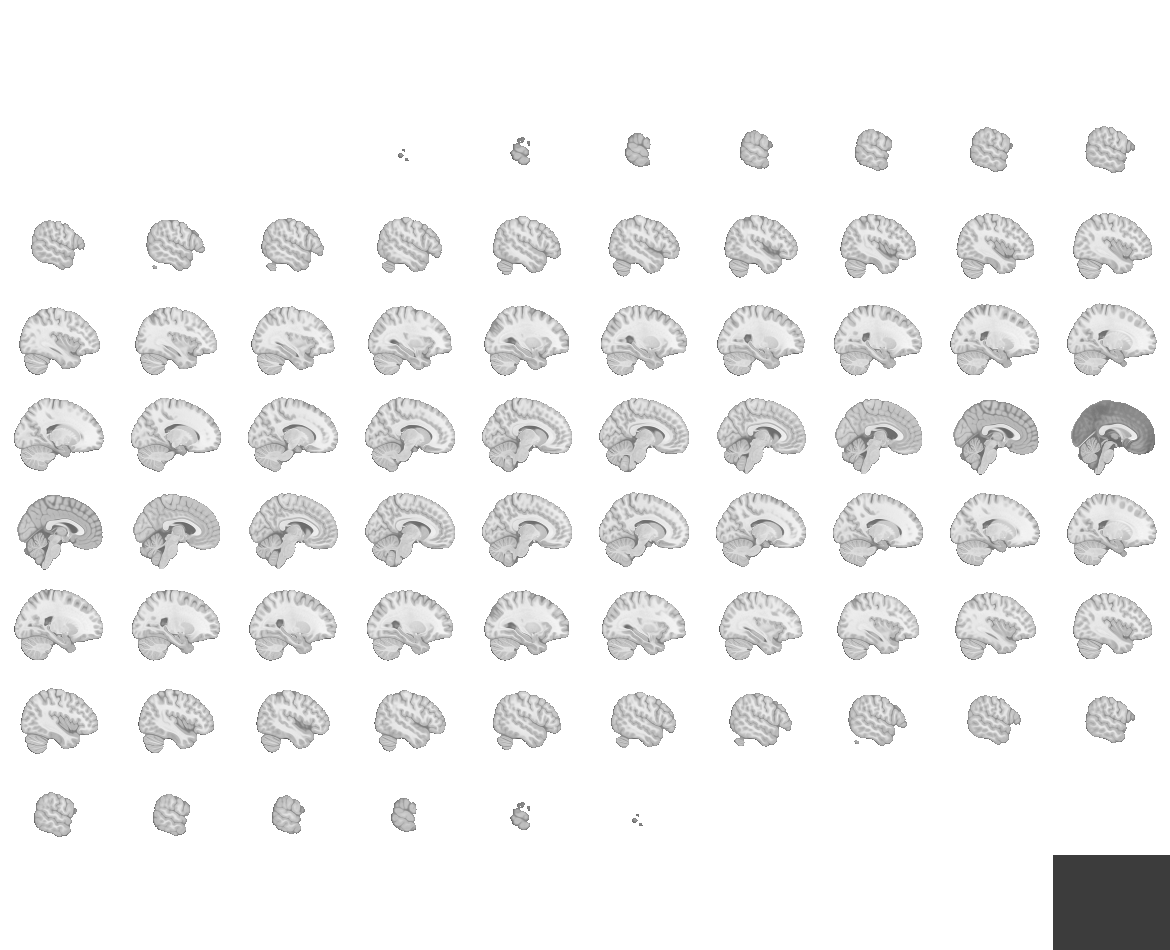
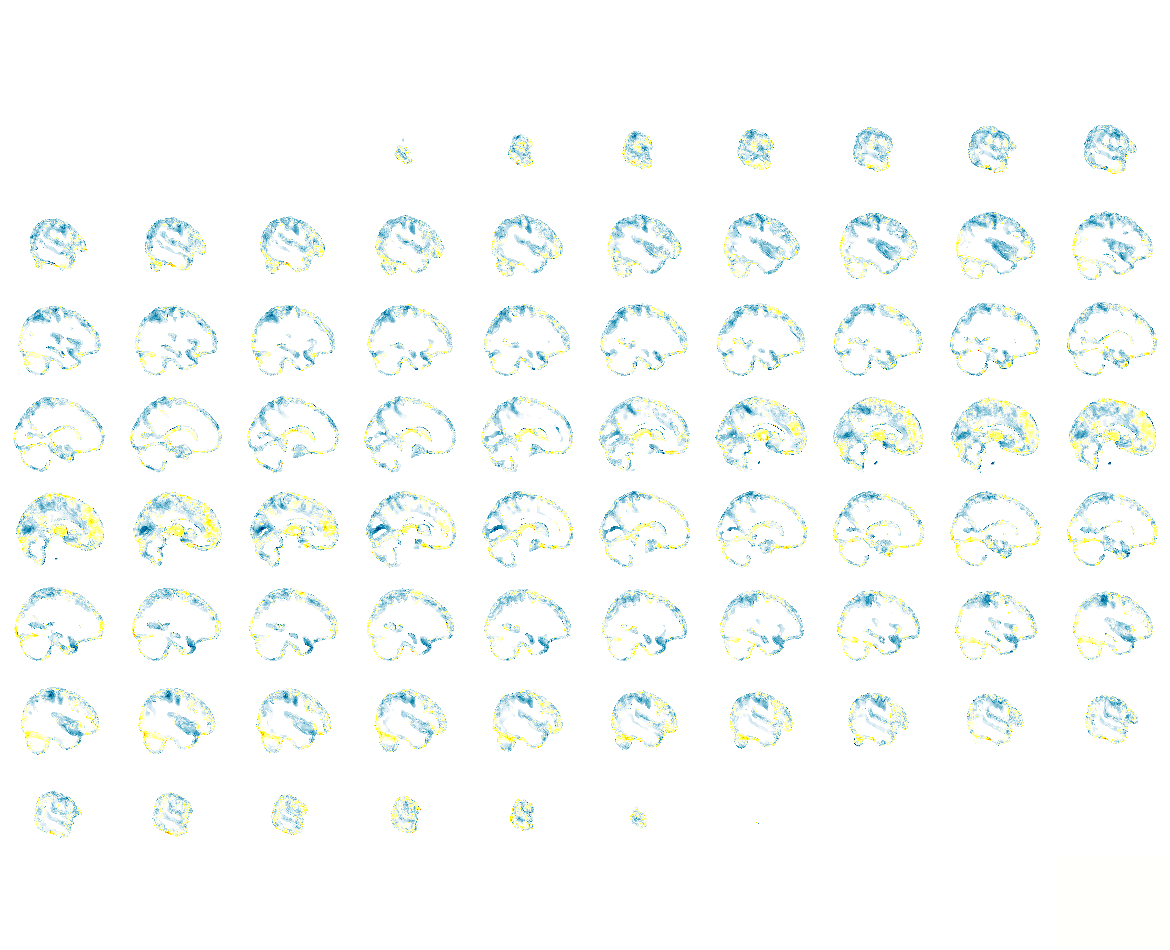

In [30]:
from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(df3['avg'], out_dir=output_directory, output_name='avg_difference.nii')

Average and Save

Image saved to: 
 /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/memory_ccm/Figures/meta_connectivity_overlap



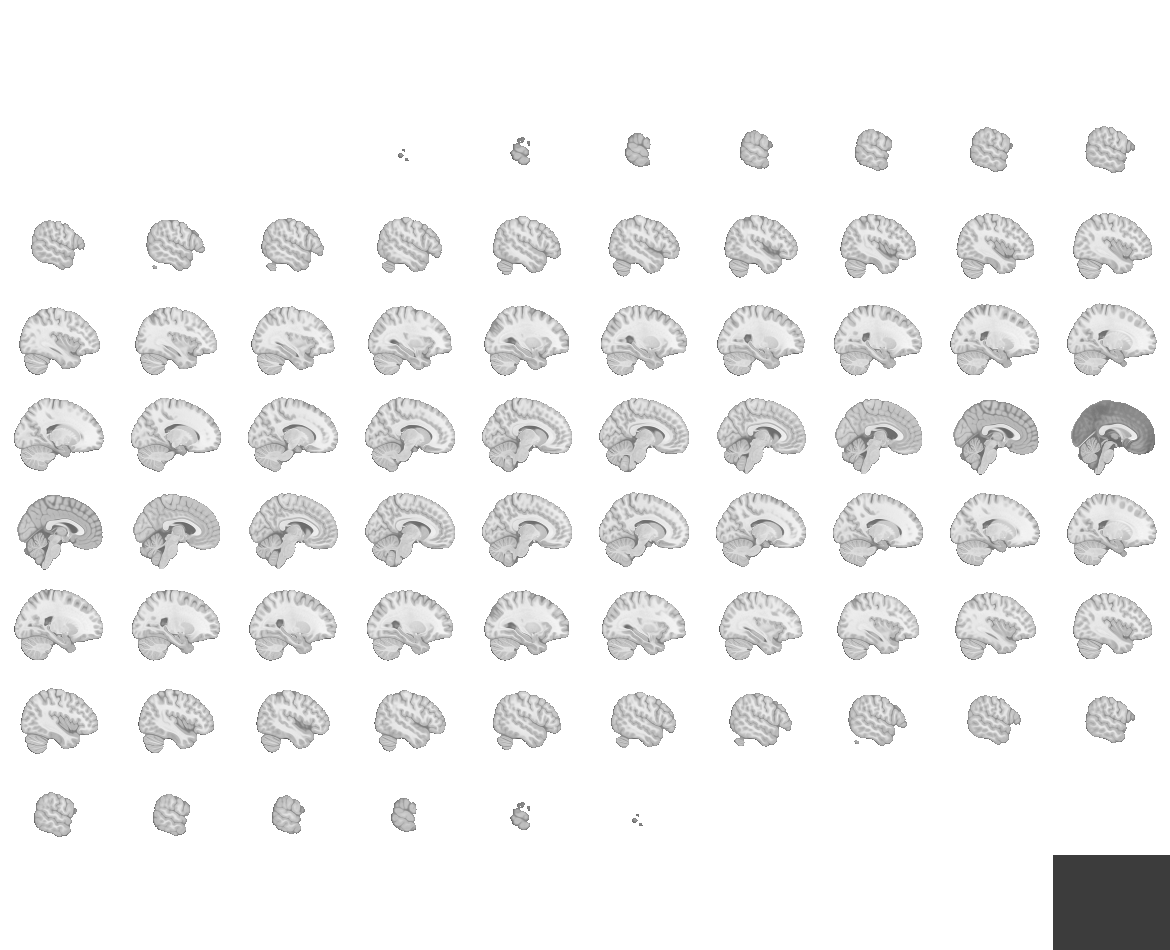
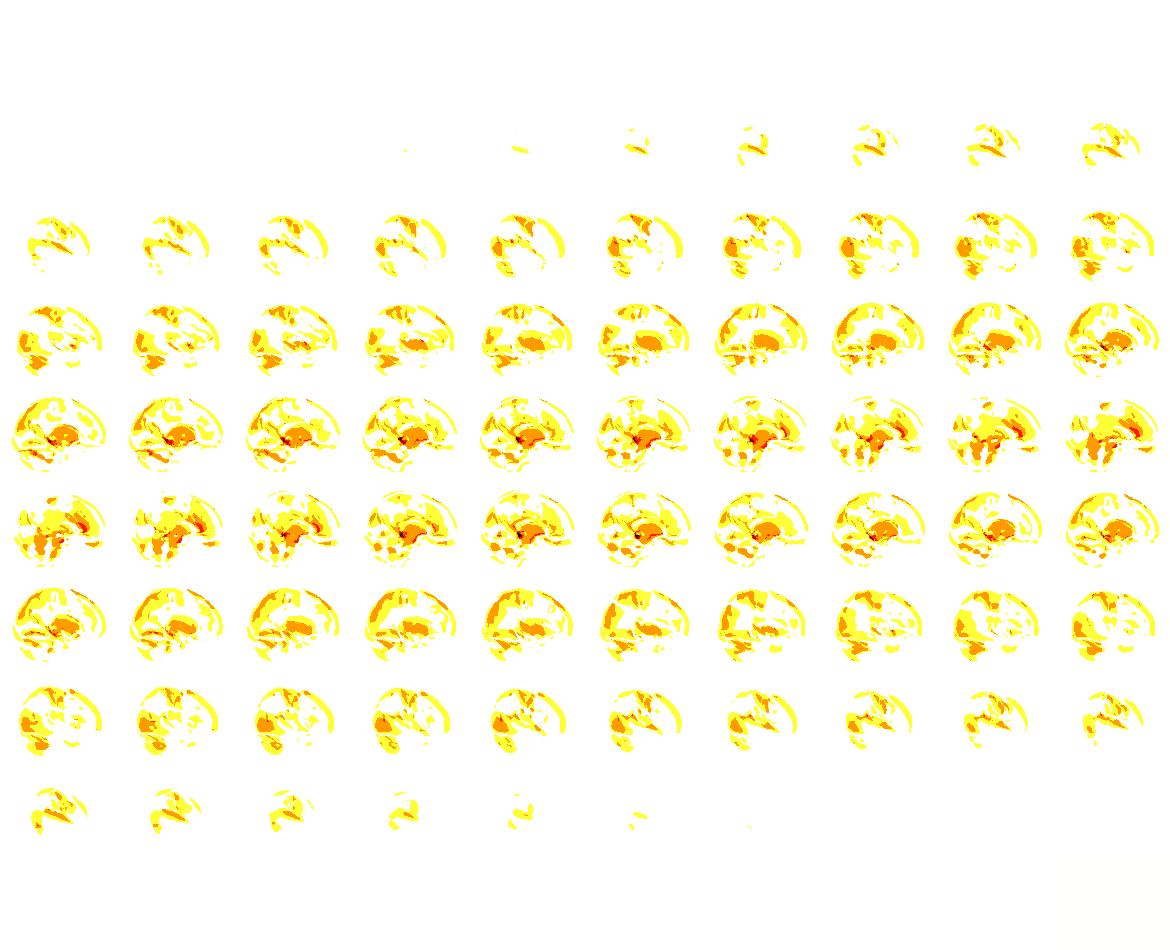

In [57]:
matrix_df1['averaged'] = matrix_df1['summed']/(matrix_df1.shape[1]-1)
# matrix_df1['averaged'] = matrix_df1['averaged']/np.max(np.abs(matrix_df1['averaged']))

from calvin_utils.nifti_utils.generate_nifti import view_and_save_nifti
view_and_save_nifti(matrix_df1['averaged'], out_dir=output_directory, output_name=('_averaged'+nifti_name))

# Without Using MNI152 2mm Resolution

In [51]:
import nibabel as nib
import numpy as np

# Load the two NIFTI files
nifti_file1 = nib.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/riMLF_localization/rIMLF_L_refined-from-Friedrich2022_MF-HF_075-MNI152.nii.gz')
nifti_file2 = nib.load('/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/riMLF_localization/rIMLF_R_refined-from-Friedrich2022_MF-HF_075-MNI152.nii.gz')

# Get the data arrays
data1 = nifti_file1.get_fdata()
data2 = nifti_file2.get_fdata()

# Ensure the dimensions of both data arrays match
if data1.shape != data2.shape:
    raise ValueError("The dimensions of the input NIFTI files do not match.")

# Add the data arrays
added_data = data1 + data2

# Create a new NIFTI image
added_img = nib.Nifti1Image(added_data, nifti_file1.affine, nifti_file1.header)

# Save the resulting image
nib.save(added_img, '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/atrophy_seeds_2023/Figures/riMLF_localization/rIMLF_BL_refined-from-Friedrich2022_MF-HF_075-MNI152.nii.gz')
